In [1]:
#importing libraries
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Import data

In [2]:
pd.set_option('display.max_columns', None)
# file = tf.keras.utils
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
raw_df.shape

(284807, 31)

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
neg, pos = np.bincount(raw_df['Class'])
total = neg + pos
print(f'Examples:\n    Total: {total}\n    Positive: {pos} ({round(100 * pos/total, 2)}% of total)\n')

Examples:
    Total: 284807
    Positive: 492 (0.17% of total)



In [6]:
raw_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
raw_df.Time.describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [8]:
raw_df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

### Data Cleaning and exploration

In [9]:
cleaned_df = raw_df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log Amount'] = np.log(cleaned_df.pop('Amount')+eps)

In [10]:
cleaned_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Log Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008105
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.989913
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.936641
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.816249
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.248367


In [11]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2) #stratify = cleaned_df['Class'], random_state = 42
train_df, val_df = train_test_split(train_df, test_size=0.2) #stratify = train_df['Class'],  random_state = 42

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [12]:
print(f'Average class probability in training set:   {train_labels.mean():.4f}')
print(f'Average class probability in validation set: {val_labels.mean():.4f}')
print(f'Average class probability in test set:       {test_labels.mean():.4f}')

Average class probability in training set:   0.0018
Average class probability in validation set: 0.0018
Average class probability in test set:       0.0016


In [13]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


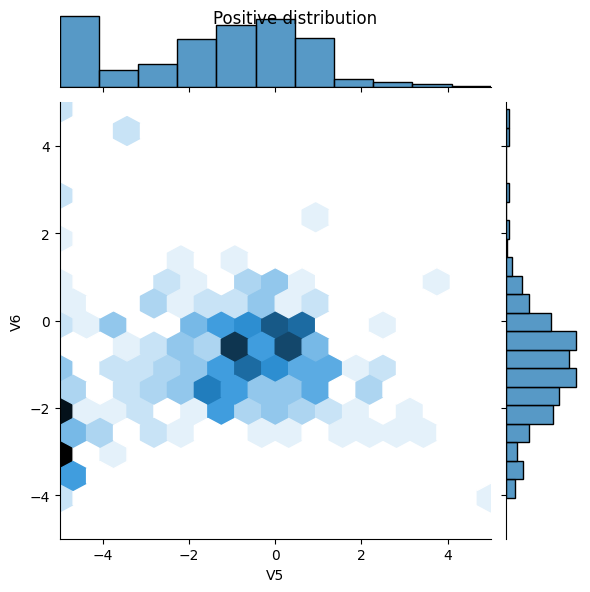

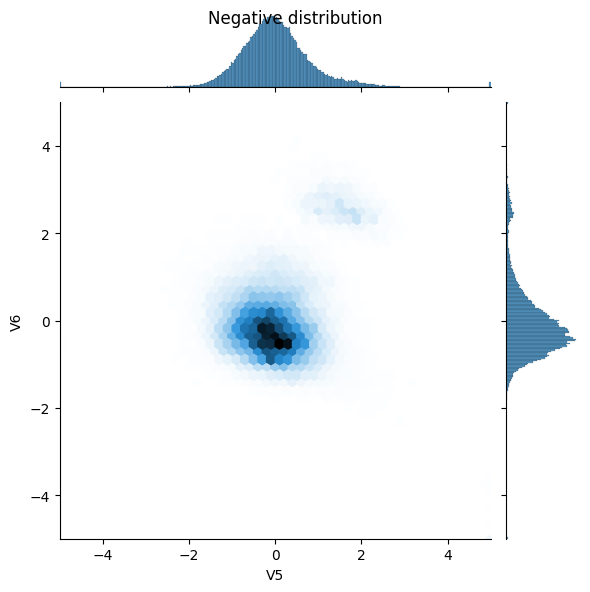

In [14]:
pos_df = pd.DataFrame(train_features[bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(x=pos_df['V5'], y=pos_df['V6'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df['V5'], y=neg_df['V6'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

### Define Model and Metrics

In [15]:
METRICS = [
    keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
    keras.metrics.MeanSquaredError(name='Brier score'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'), 
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
    keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
        
    model = keras.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias),
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics
    )

    return model

### Baseline Model

In [16]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [17]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 497 (1.94 KB)
Trainable params: 497 (1.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.predict(train_features[:10])

1/1 [==============================] - 0s 102ms/step


array([[0.2686113 ],
       [0.4443339 ],
       [0.17336477],
       [0.25269958],
       [0.23895991],
       [0.27901608],
       [0.4807311 ],
       [0.22915627],
       [0.1584003 ],
       [0.3131001 ]], dtype=float32)

In [19]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=2)
print("Loss: {:0.4f}".format(results[0]))

90/90 - 1s - loss: 0.3463 - cross entropy: 0.3463 - Brier score: 0.0904 - tp: 265.0000 - fp: 5649.0000 - tn: 176307.0000 - fn: 55.0000 - accuracy: 0.9687 - precision: 0.0448 - recall: 0.8281 - auc: 0.9272 - prc: 0.6203 - 982ms/epoch - 11ms/step
Loss: 0.3463


In [20]:
initial_bias = np.log([pos/neg])
initial_bias

array([-6.35935934])

### Set initial correct bias

In [21]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

1/1 [==============================] - 0s 63ms/step


array([[0.00650853],
       [0.00352441],
       [0.0017003 ],
       [0.00209666],
       [0.00206687],
       [0.00231907],
       [0.00747206],
       [0.00103645],
       [0.00408775],
       [0.00198231]], dtype=float32)

In [22]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=2)
print("Loss: {:0.4f}".format(results[0]))

90/90 - 1s - loss: 0.0126 - cross entropy: 0.1795 - Brier score: 0.0461 - tp: 276.0000 - fp: 5669.0000 - tn: 358243.0000 - fn: 364.0000 - accuracy: 0.9835 - precision: 0.0464 - recall: 0.4313 - auc: 0.6791 - prc: 0.3199 - 914ms/epoch - 10ms/step
Loss: 0.0126


In [23]:
tempfile.tempdir = os.getcwd()
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

### Confirm if bias fix helps

In [24]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [25]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [26]:
def plot_loss(history, label, n):
    # Use a log scale on y-axis to show the wide range of values.
    plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
    plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

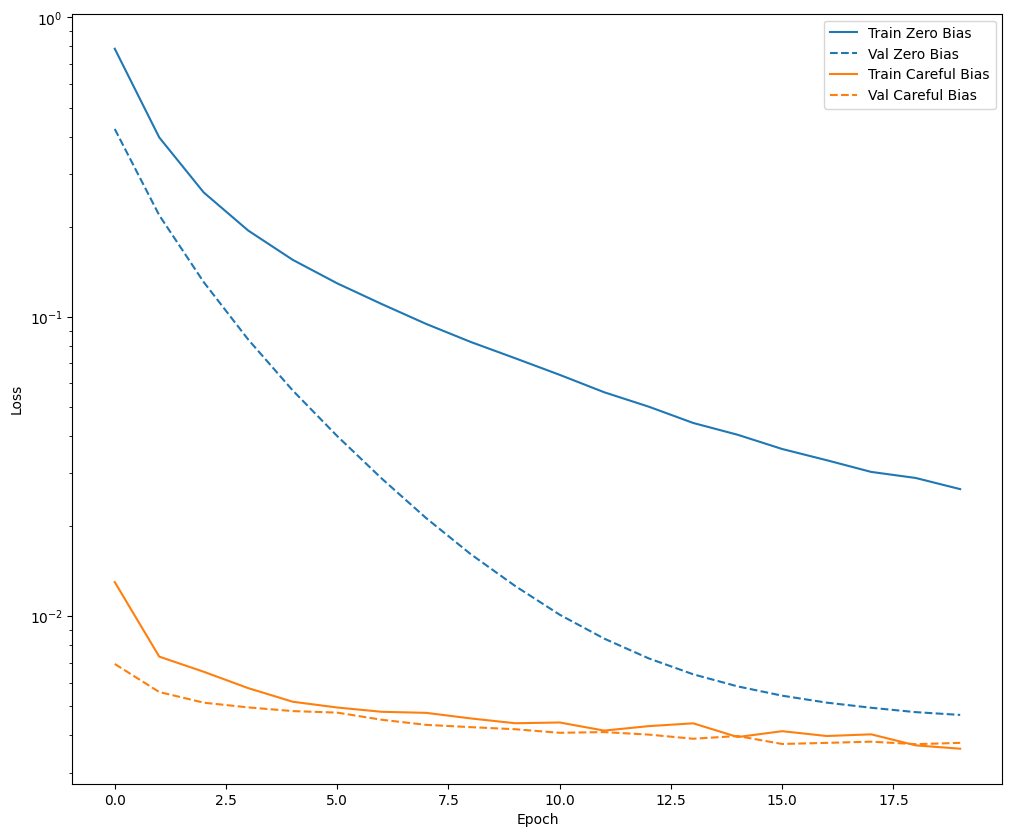

In [27]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

### Model Training

In [28]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    verbose = 0
)

Restoring model weights from the end of the best epoch: 35.
Epoch 45: early stopping


In [29]:
pd.DataFrame(baseline_history.history).head()

,loss,cross entropy,Brier score,tp,fp,tn,fn,accuracy,precision,recall,auc,prc,val_loss,val_cross entropy,val_Brier score,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,val_prc
0,0.012198,0.010514,0.001625,120.0,122.0,227321.0,282.0,0.998227,0.495868,0.298507,0.837109,0.292230,0.006663,0.006663,0.001208,22.0,10.0,45477.0,60.0,0.998464,0.687500,0.268293,0.905819,0.602093
1,0.007635,0.007635,0.001074,127.0,26.0,181930.0,193.0,0.998799,0.830065,0.396875,0.884229,0.503669,0.005512,0.005512,0.000922,40.0,11.0,45476.0,42.0,0.998837,0.784314,0.487805,0.895549,0.615338
2,0.006274,0.006274,0.000915,158.0,26.0,181930.0,162.0,0.998969,0.858696,0.493750,0.904492,0.614851,0.005255,0.005255,0.000785,56.0,12.0,45475.0,26.0,0.999166,0.823529,0.682927,0.895824,0.582089
3,0.005567,0.005567,0.000810,180.0,28.0,181928.0,140.0,0.999078,0.865385,0.562500,0.919576,0.657920,0.005105,0.005105,0.000753,58.0,12.0,45475.0,24.0,0.999210,0.828571,0.707317,0.901967,0.596574
4,0.005274,0.005274,0.000803,179.0,30.0,181926.0,141.0,0.999062,0.856459,0.559375,0.925525,0.662792,0.004929,0.004929,0.000733,58.0,12.0,45475.0,24.0,0.999210,0.828571,0.707317,0.901991,0.611180


### Training history

In [30]:
def plot_metrics(history):
    metrics = ['loss', 'prc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_", " ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])

    plt.legend()

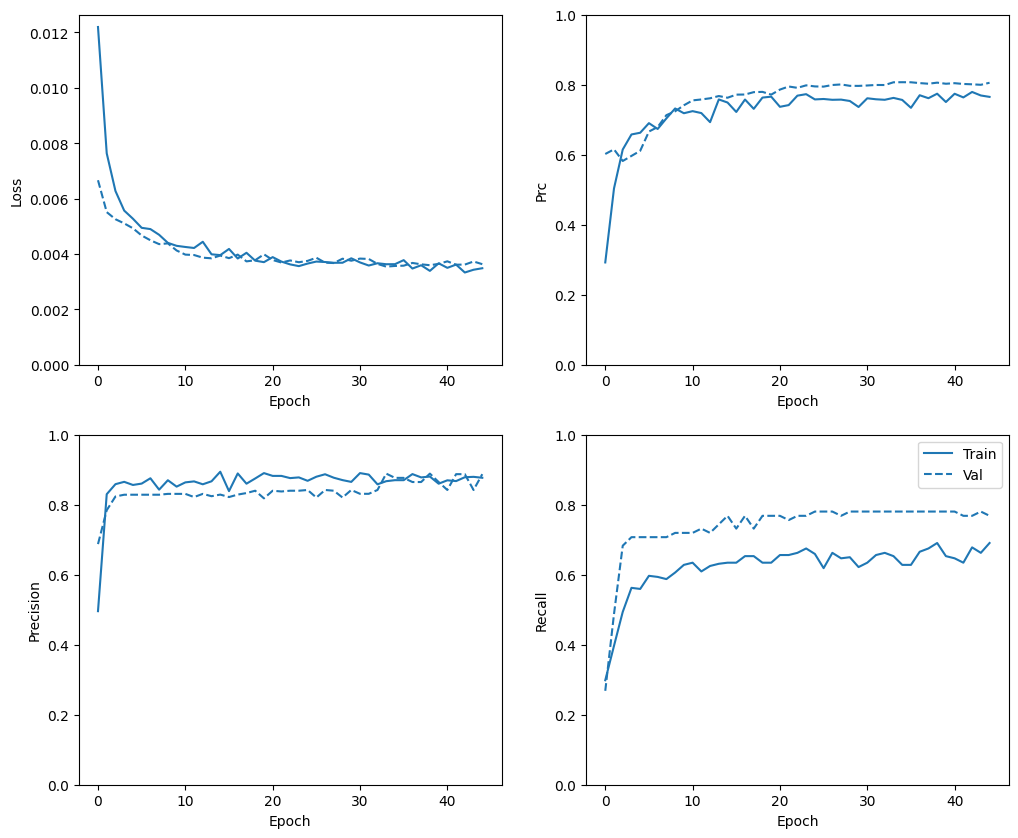

In [31]:
plot_metrics(baseline_history)

### Evaluation

In [32]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

28/28 [==============================] - 0s 1ms/step


In [33]:
def plot_cm(labels, predictions, threshold=0.5):
    cm = confusion_matrix(labels, predictions > threshold)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(threshold))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss                :0.002
cross entropy       :0.002
Brier score         :0.0
tp                  :71.0
fp                  :8.0
tn                  :56864.0
fn                  :19.0
accuracy            :1.0
precision           :0.899
recall              :0.789
auc                 :0.955
prc                 :0.836

Legitimate Transactions Detected (True Negatives):  56864
Legitimate Transactions Incorrectly Detected (False Positives):  8
Fraudulent Transactions Missed (False Negatives):  19
Fraudulent Transactions Detected (True Positives):  71
Total Fraudulent Transactions:  90


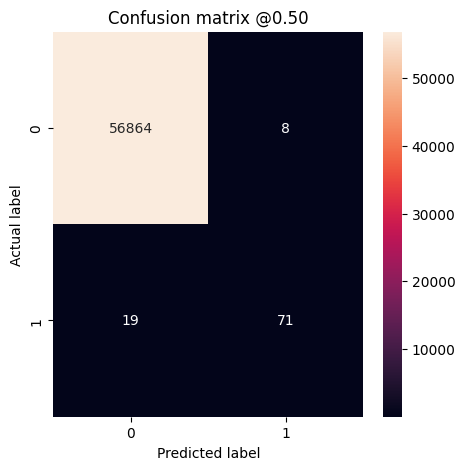

In [34]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)

for name, value in zip(model.metrics_names, baseline_results):
    print(f'{name:<20s}:{round(value, 3)}')
print()

plot_cm(test_labels, test_predictions_baseline)

Legitimate Transactions Detected (True Negatives):  56858
Legitimate Transactions Incorrectly Detected (False Positives):  14
Fraudulent Transactions Missed (False Negatives):  13
Fraudulent Transactions Detected (True Positives):  77
Total Fraudulent Transactions:  90
Legitimate Transactions Detected (True Negatives):  56801
Legitimate Transactions Incorrectly Detected (False Positives):  71
Fraudulent Transactions Missed (False Negatives):  10
Fraudulent Transactions Detected (True Positives):  80
Total Fraudulent Transactions:  90


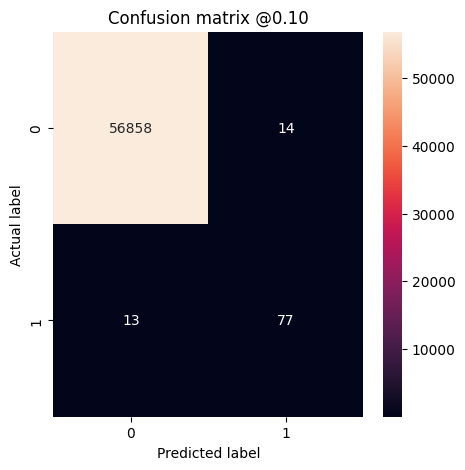

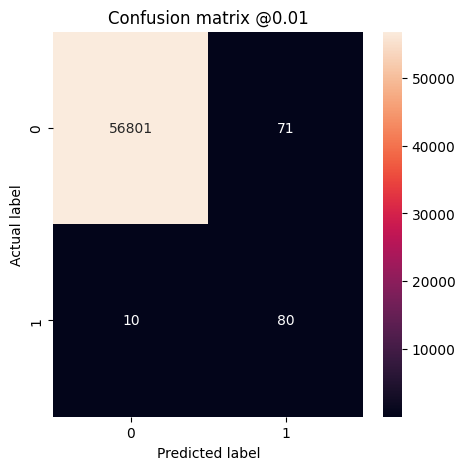

In [35]:
plot_cm(test_labels, test_predictions_baseline, threshold=0.1)
plot_cm(test_labels, test_predictions_baseline, threshold=0.01)

In [36]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,20])
    plt.ylim([80,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

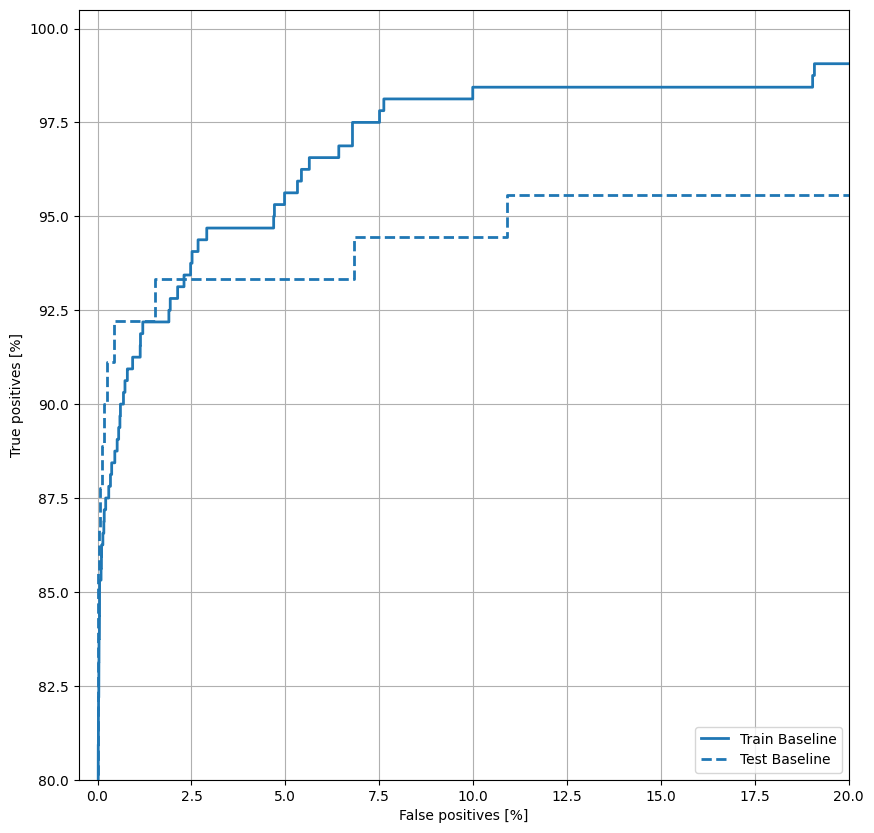

In [37]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right');

In [38]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

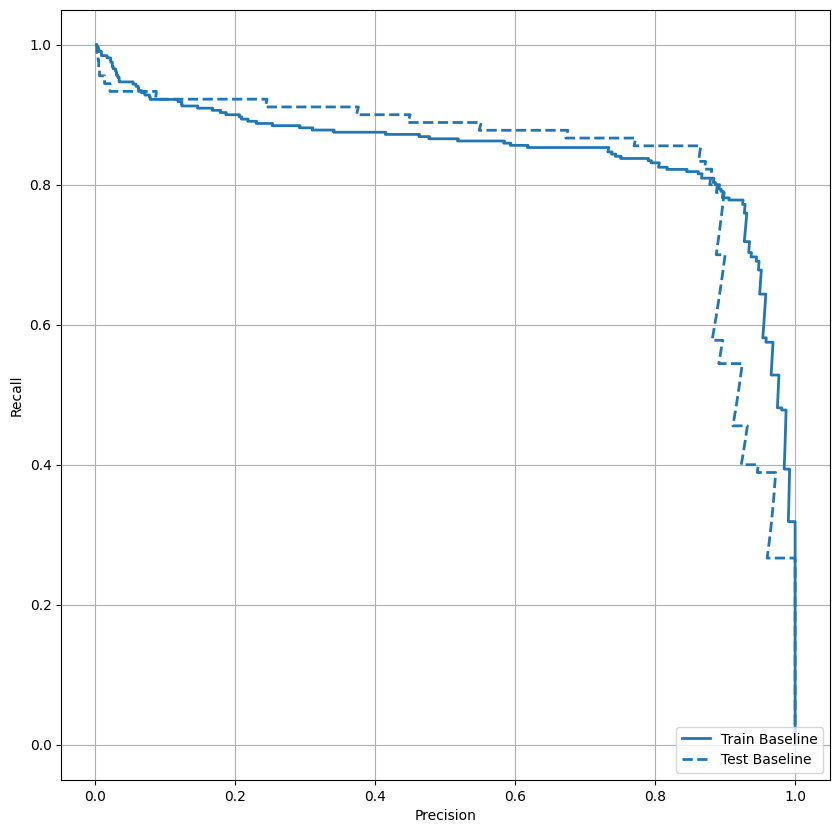

In [39]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right');

### Model Training using Class Weights

In [40]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 289.44


In [41]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight)

Epoch 1/100
90/90 [==============================] - 3s 12ms/step - loss: 1.4360 - cross entropy: 0.0166 - Brier score: 0.0030 - tp: 175.0000 - fp: 545.0000 - tn: 238283.0000 - fn: 235.0000 - accuracy: 0.9967 - precision: 0.2431 - recall: 0.4268 - auc: 0.8595 - prc: 0.2704 - val_loss: 0.0122 - val_cross entropy: 0.0122 - val_Brier score: 0.0013 - val_tp: 51.0000 - val_fp: 30.0000 - val_tn: 45457.0000 - val_fn: 31.0000 - val_accuracy: 0.9987 - val_precision: 0.6296 - val_recall: 0.6220 - val_auc: 0.9439 - val_prc: 0.5114
Epoch 2/100
90/90 [==============================] - 0s 4ms/step - loss: 0.6784 - cross entropy: 0.0337 - Brier score: 0.0066 - tp: 212.0000 - fp: 1265.0000 - tn: 180691.0000 - fn: 108.0000 - accuracy: 0.9925 - precision: 0.1435 - recall: 0.6625 - auc: 0.9110 - prc: 0.3664 - val_loss: 0.0194 - val_cross entropy: 0.0194 - val_Brier score: 0.0022 - val_tp: 64.0000 - val_fp: 82.0000 - val_tn: 45405.0000 - val_fn: 18.0000 - val_accuracy: 0.9978 - val_precision: 0.4384 - val

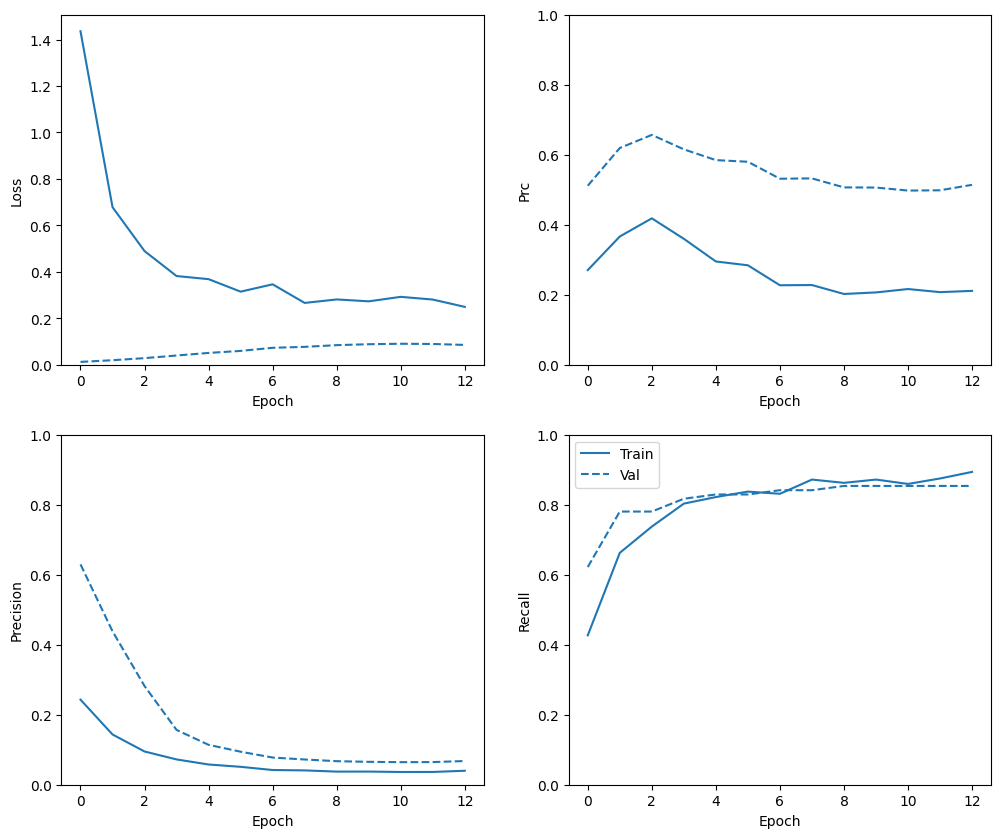

In [42]:
plot_metrics(weighted_history)

In [43]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

28/28 [==============================] - 0s 1ms/step


loss                :0.025
cross entropy       :0.025
Brier score         :0.003
tp                  :78.0
fp                  :161.0
tn                  :56711.0
fn                  :12.0
accuracy            :0.997
precision           :0.326
recall              :0.867
auc                 :0.977
prc                 :0.761

Legitimate Transactions Detected (True Negatives):  56711
Legitimate Transactions Incorrectly Detected (False Positives):  161
Fraudulent Transactions Missed (False Negatives):  12
Fraudulent Transactions Detected (True Positives):  78
Total Fraudulent Transactions:  90


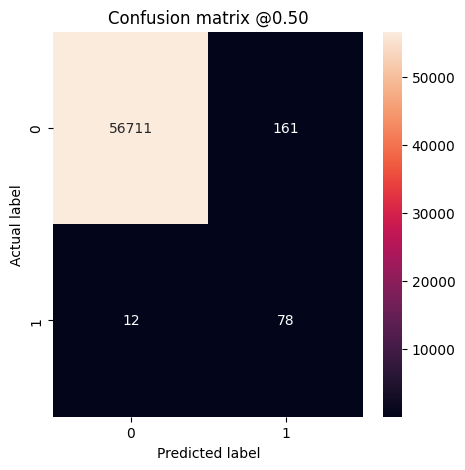

In [44]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
    print(f'{name:<20s}:{round(value, 3)}')
print()

plot_cm(test_labels, test_predictions_weighted)

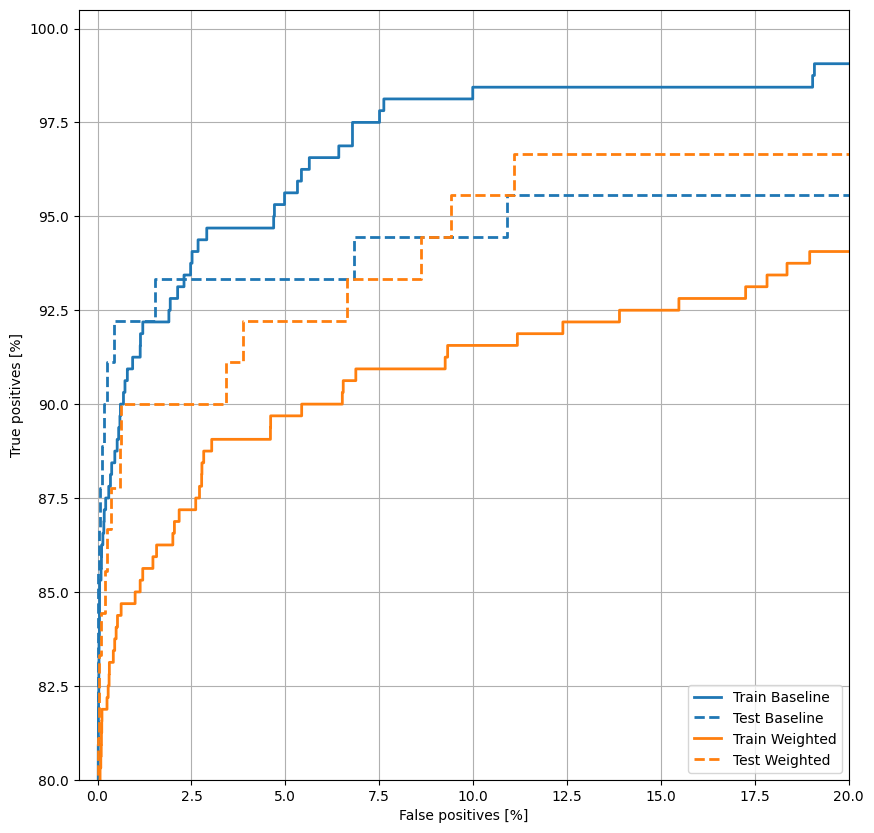

In [45]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right');

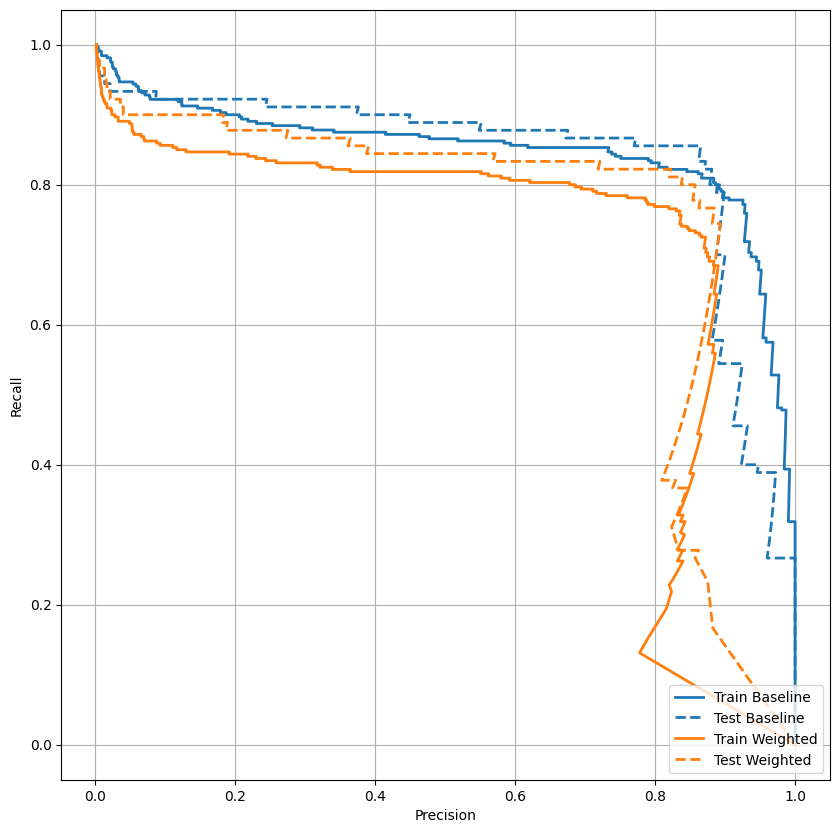

In [46]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_prc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_prc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right');

### Model Training using Oversampling

In [47]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

#### numpy way

In [48]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(181956, 29)

In [49]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(363912, 29)

#### tf.data way

In [50]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
    ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
    ds = ds.shuffle(BUFFER_SIZE).repeat()
    return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [51]:
# len(list(neg_ds.as_numpy_iterator()))

In [52]:
for features, label in pos_ds.take(1):
    print("Features:\n", features.numpy())
    print()
    print("Label: ", label.numpy())

Features:
 [-1.35456265  3.54408281 -5.          4.51919142 -0.04274587 -2.33824446
 -2.47022329  1.48865818 -3.47494795 -5.          5.         -5.
 -0.0662877  -5.         -1.85445505 -2.72417781 -3.27789046  0.32691135
 -1.69724787  0.51390637  1.00694645 -0.60102857 -0.62487353 -0.47131819
  1.93654903  0.86093328  0.69510149  0.91390177 -1.4601728 ]

Label:  1


In [53]:
resampled_ds = tf.data.Dataset.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [55]:
for features, label in resampled_ds.take(1):
    print(label.numpy().mean())

0.48583984375


In [57]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

278.0

In [58]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
278/278 [==============================] - 8s 20ms/step - loss: 0.3880 - cross entropy: 0.3550 - Brier score: 0.1178 - tp: 257696.0000 - fp: 85154.0000 - tn: 255921.0000 - fn: 27535.0000 - accuracy: 0.8201 - precision: 0.7516 - recall: 0.9035 - auc: 0.9381 - prc: 0.9440 - val_loss: 0.2310 - val_cross entropy: 0.2310 - val_Brier score: 0.0535 - val_tp: 72.0000 - val_fp: 1493.0000 - val_tn: 43994.0000 - val_fn: 10.0000 - val_accuracy: 0.9670 - val_precision: 0.0460 - val_recall: 0.8780 - val_auc: 0.9622 - val_prc: 0.6752
Epoch 2/100
278/278 [==============================] - 4s 15ms/step - loss: 0.1934 - cross entropy: 0.1934 - Brier score: 0.0582 - tp: 264434.0000 - fp: 20018.0000 - tn: 264269.0000 - fn: 20623.0000 - accuracy: 0.9286 - precision: 0.9296 - recall: 0.9277 - auc: 0.9788 - prc: 0.9828 - val_loss: 0.1261 - val_cross entropy: 0.1261 - val_Brier score: 0.0269 - val_tp: 70.0000 - val_fp: 1106.0000 - val_tn: 44381.0000 - val_fn: 12.0000 - val_accuracy: 0.9755 - val_p

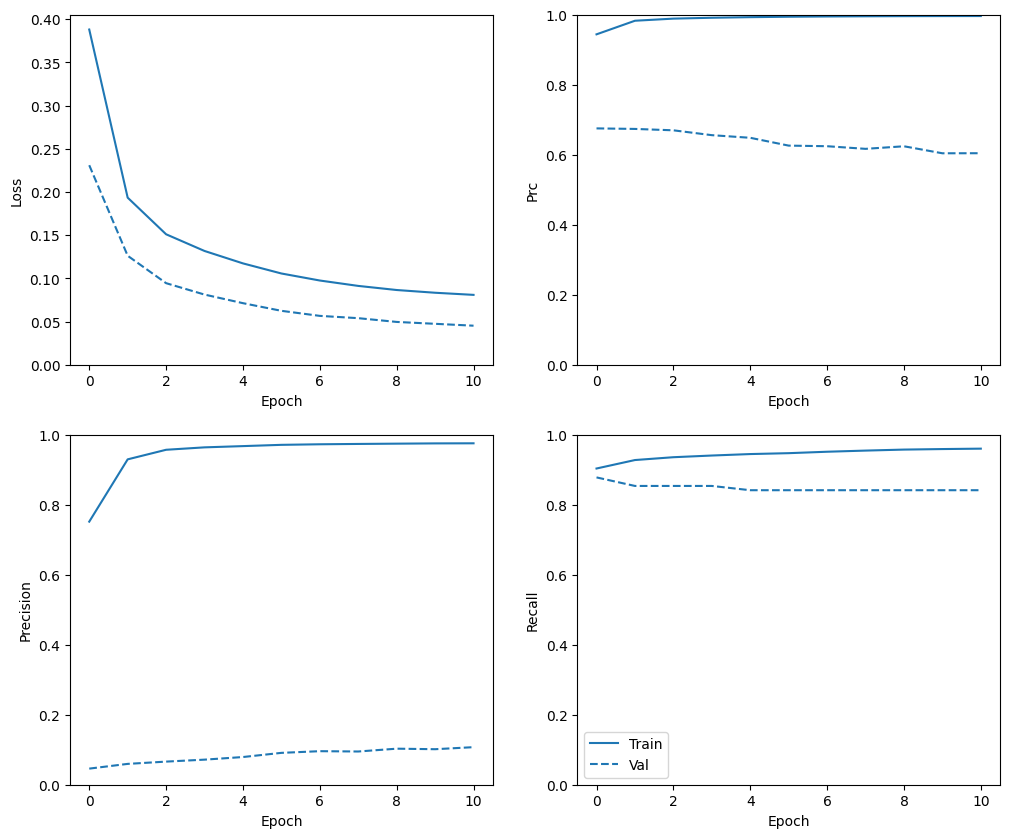

In [59]:
plot_metrics(resampled_history)

#### Retrain due to overfitting

In [60]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
20/20 [==============================] - 4s 86ms/step - loss: 0.7617 - cross entropy: 0.3844 - Brier score: 0.1299 - tp: 16573.0000 - fp: 14069.0000 - tn: 51878.0000 - fn: 4009.0000 - accuracy: 0.7911 - precision: 0.5409 - recall: 0.8052 - auc: 0.9080 - prc: 0.7756 - val_loss: 0.9517 - val_cross entropy: 0.9517 - val_Brier score: 0.3592 - val_tp: 82.0000 - val_fp: 32455.0000 - val_tn: 13032.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.2878 - val_precision: 0.0025 - val_recall: 1.0000 - val_auc: 0.9228 - val_prc: 0.2039
Epoch 2/1000
20/20 [==============================] - 0s 23ms/step - loss: 0.6143 - cross entropy: 0.6143 - Brier score: 0.2134 - tp: 18061.0000 - fp: 11970.0000 - tn: 8484.0000 - fn: 2445.0000 - accuracy: 0.6481 - precision: 0.6014 - recall: 0.8808 - auc: 0.8380 - prc: 0.8786 - val_loss: 0.8162 - val_cross entropy: 0.8162 - val_Brier score: 0.3013 - val_tp: 79.0000 - val_fp: 26321.0000 - val_tn: 19166.0000 - val_fn: 3.0000 - val_accuracy: 0.4223 - val_precis

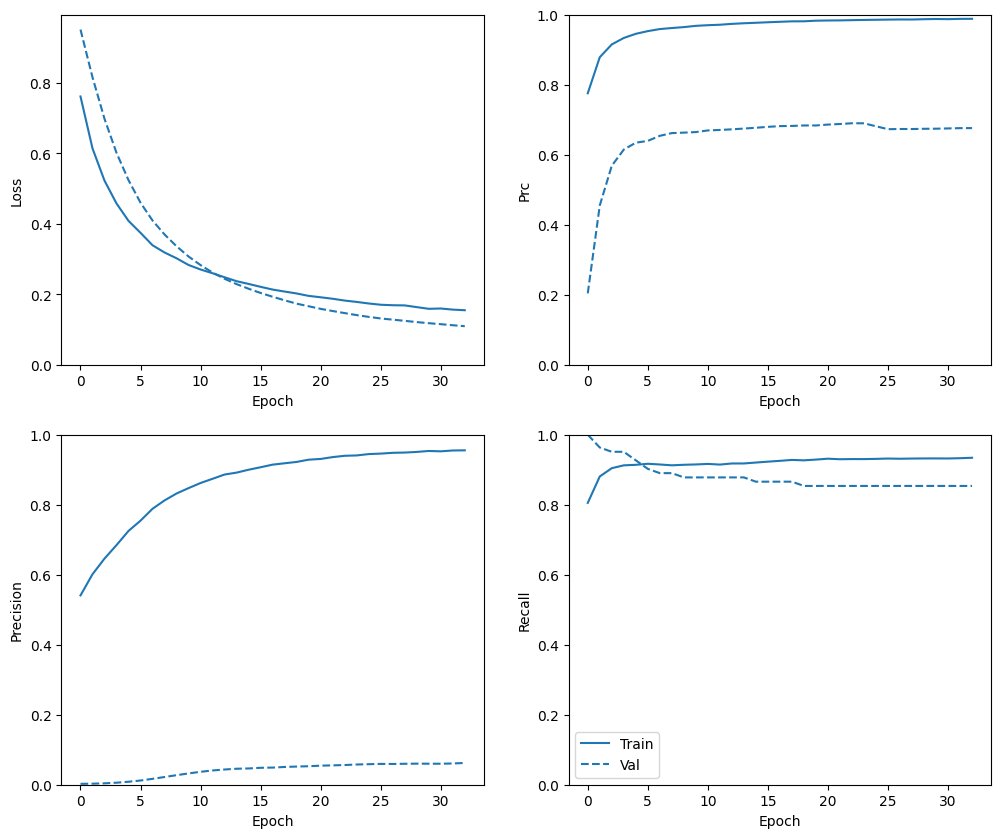

In [61]:
plot_metrics(resampled_history)

In [62]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

28/28 [==============================] - 0s 1ms/step


loss                :0.145
cross entropy       :0.145
Brier score         :0.031
tp                  :84.0
fp                  :1496.0
tn                  :55376.0
fn                  :6.0
accuracy            :0.974
precision           :0.053
recall              :0.933
auc                 :0.979
prc                 :0.778

Legitimate Transactions Detected (True Negatives):  55376
Legitimate Transactions Incorrectly Detected (False Positives):  1496
Fraudulent Transactions Missed (False Negatives):  6
Fraudulent Transactions Detected (True Positives):  84
Total Fraudulent Transactions:  90


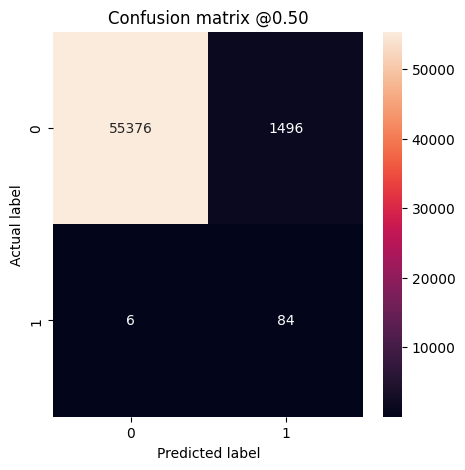

In [63]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
    print(f'{name:<20s}:{round(value, 3)}')
print()
plot_cm(test_labels, test_predictions_resampled)

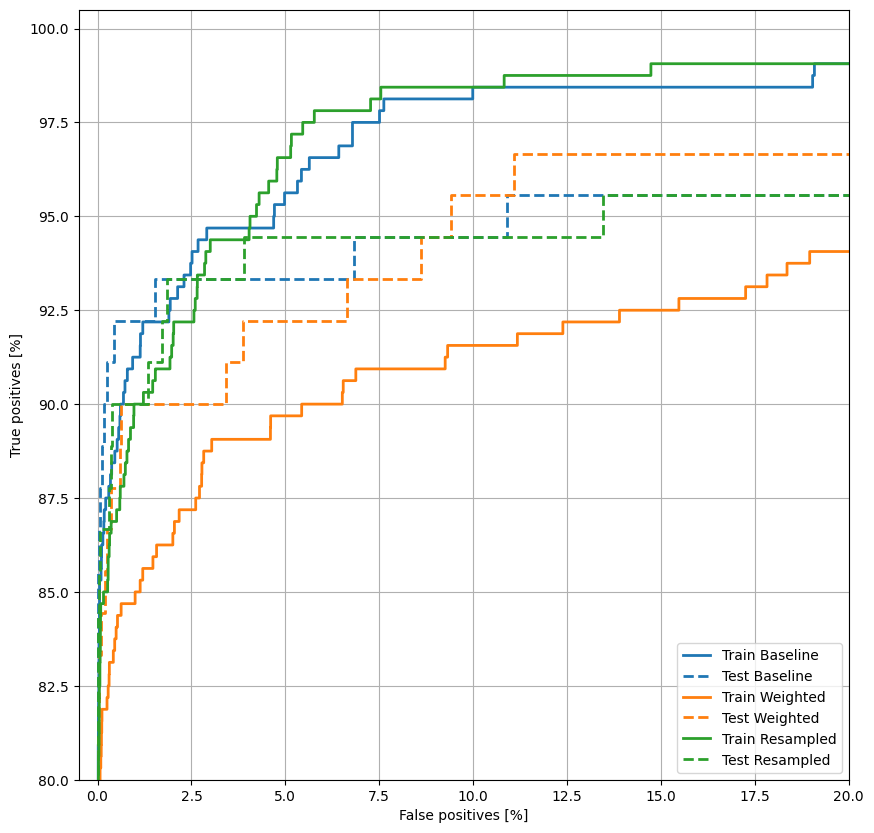

In [64]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')
plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right');

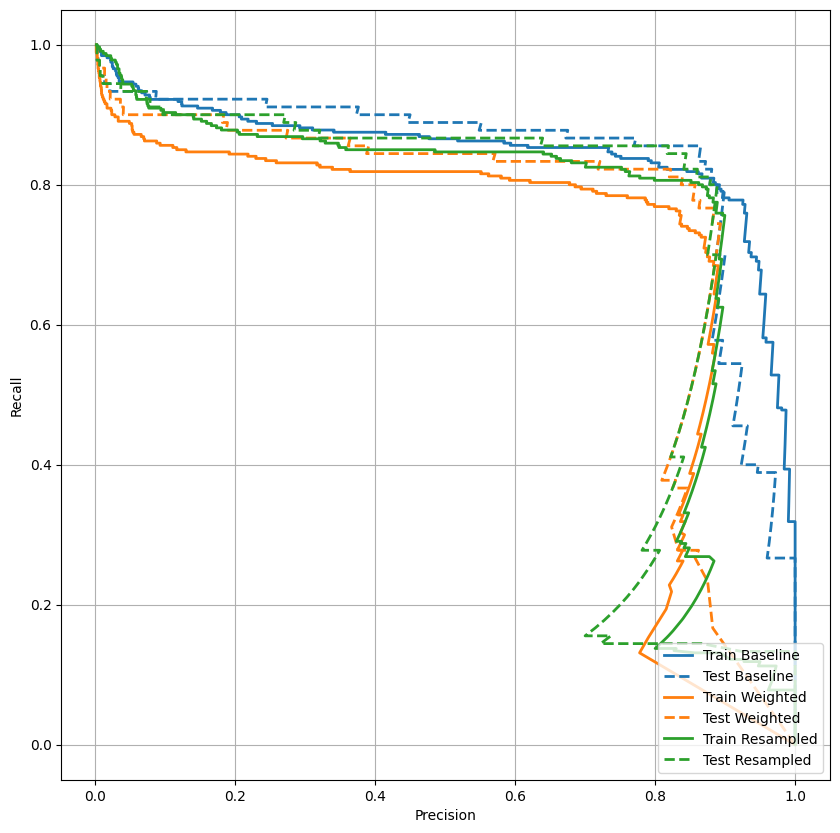

In [65]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_prc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_prc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_prc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_prc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right');